# Assignment 1
Linear Regression with Deep Neural Network

In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [40]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [42]:
data = data.dropna()

<Axes: >

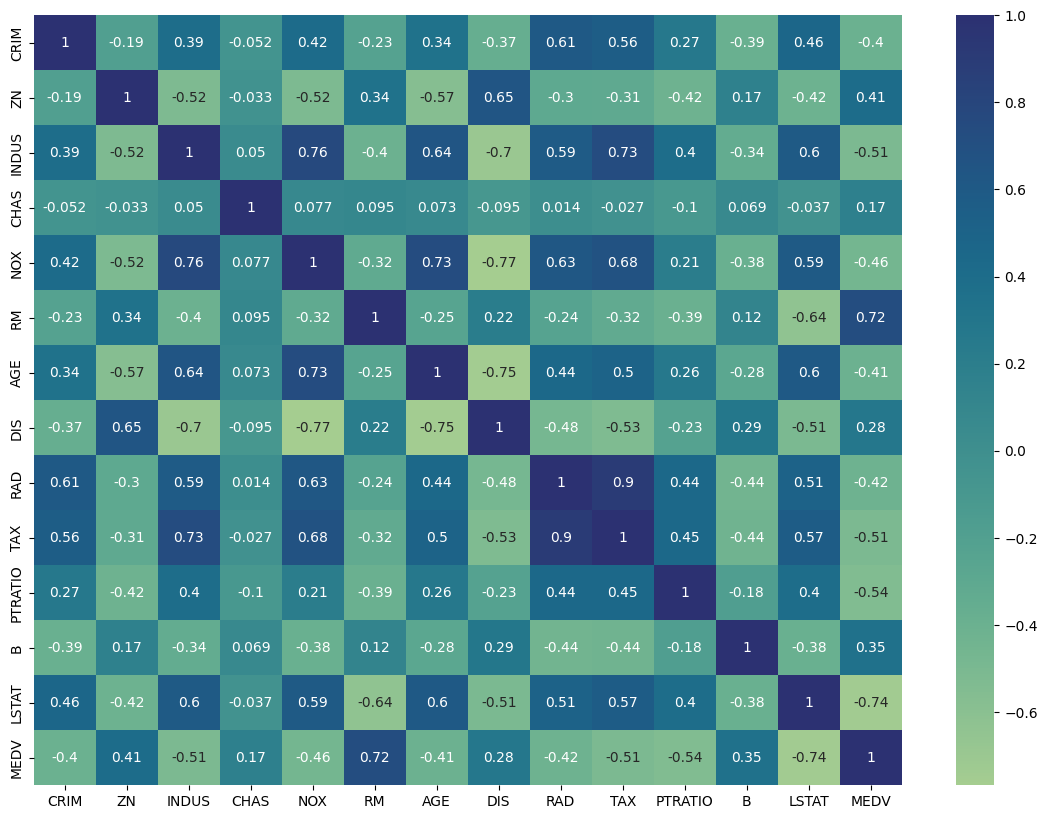

In [43]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap='crest', annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

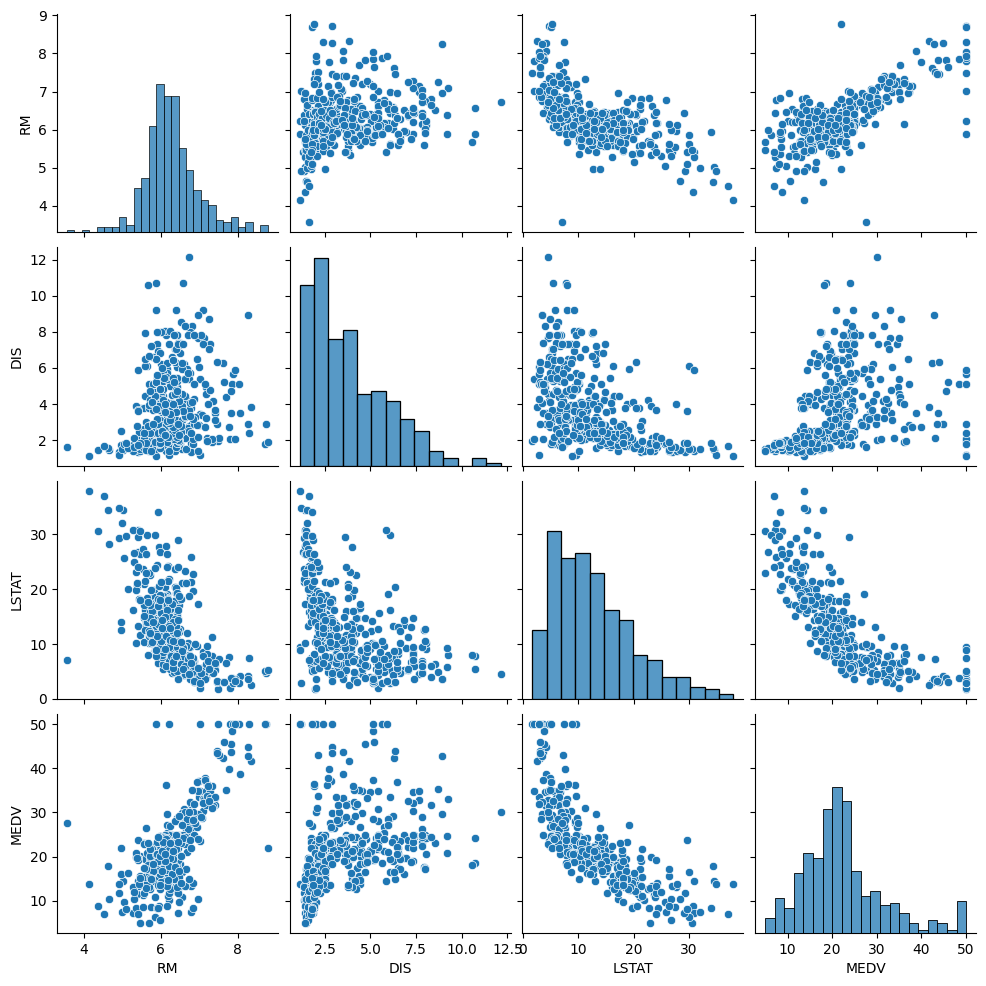

In [44]:
sns.pairplot(data[['RM', 'DIS', 'LSTAT', 'MEDV']])

In [45]:
X = data[['RM', 'DIS', 'LSTAT']]
y = data['MEDV']

In [46]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [47]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [59]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(3,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [60]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

In [61]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(train_x_scaled, train_y, validation_data=(test_x_scaled, test_y), epochs=100, callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 2s 20ms/step - loss: 591.7112 - mse: 591.7112 - val_loss: 502.9671 - val_mse: 502.9671
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 565.6124 - mse: 565.6124 - val_loss: 472.1807 - val_mse: 472.1807
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 520.6295 - mse: 520.6295 - val_loss: 415.0276 - val_mse: 415.0276
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 440.4025 - mse: 440.4025 - val_loss: 322.4393 - val_mse: 322.4393
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 322.1648 - mse: 322.1648 - val_loss: 202.8568 - val_mse: 202.8568
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 181.8999 - mse: 181.8999 - val_loss: 110.5673 - val_mse: 110.5673
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 98.6826 - mse: 98.6826 - val_loss: 78.8631 - val_mse: 78.8631
Epoch 8/100
10/10 [===========

In [63]:
model.evaluate(test_x_scaled, test_y)

3/3 [==============================] - 0s 3ms/step - loss: 10.7036 - mse: 10.7036


[10.703593254089355, 10.703593254089355]